In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import SVG

plt.rcParams['figure.figsize'] = [12, 9]

# Simple Neuron from the Ground Up

## Linear regression

The slope of a straight line is closely related to the angle made by the line with the x-axis, since 

$$m=\tan\theta=\frac{\text{Opposite}}{\text{Adjacent}}=\frac{y-y_0}{x-x_0}$$

If we would want to know the derivative of a certain function, we just need to take really close points on that function and draw a straight line. This leads to the definition of derivative

$$\frac{dy}{dx}=\lim_{h\to 0} \frac{y(x+h)-y(x)}{h}=\lim_{x\to x_0} \frac{y(x)-y(x_0)}{x-x_0}$$

and it basically tells the amount of change in $y$ when $x$ changes a little

Rearranging this, we find that a good approximation of $y$ close to $x_0$ is

$$y(x) = y(x_0)+ \left.\frac{dy}{dx}\right|_{x_0}\left(x-x_0\right)$$

or

$$y(x) = \left.\frac{dy}{dx}\right|_{x_0} x + y(x_0) - \left.\frac{dy}{dx}\right|_{x_0} x_0$$

Since the last two terms are constant, we can rewrite this using $\left.\frac{dy}{dx}\right|_{x_0} = w$ and $ b = y(x_0) - \left.\frac{dy}{dx}\right|_{x_0} x_0$ as

$$y(x) = wx+b$$

![righttriangle](img/right_triangle.png)

## Activation Function

The purpose of an activation function is to introduce non-linearity to the output of a neuron.

Given $\vec{x}\in \mathcal{R}^{n_x}$, we want to find $\hat{y}$ which is, for example, the probability of $y=1$ on binary classification.

The parameters are the weights $\vec{w}\in \mathcal{R}^{n_x}$ and the bias $b\in\mathcal{R}$.

The output is $\hat{y}=\rho\left({\vec{w}}^{T}\cdot \vec{x} + b\right)$, when $\rho$ is the sigmoid function (in this case), defined as
$$\rho(z) = \frac{1}{1+\exp^{-z}}$$

In [2]:
# Exponential in series definition
def expuz(x, n=10000000):
    return (1.+x/n)**n

# Sigmoid function definition
def ρ(x):
    return 1./(1. + expuz(-x))

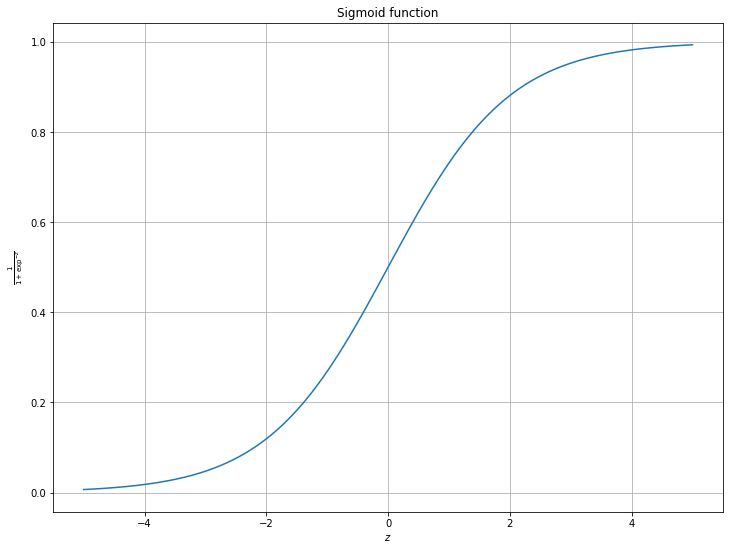

In [3]:
# Plotting sigmoid

z = np.linspace(-5,5,500)
y = ρ(z)

plt.plot(z,y)
plt.xlabel(r'$z$')
plt.ylabel(r'$\frac{1}{1+\exp^{-z}}$')
plt.title('Sigmoid function')
plt.grid()
plt.show()


## Cost function

Given a set of $m$ training examples $\vec{x}^{(i)}$ with $i\in\{0,1,\dots,m\}$, and the appropiate labels $y^{(i)}$, we want the prediction $\hat{y}^{(i)}$ to be $\hat{y}^{(i)}\approx y^{(i)}$

We define an **Error function** (or **Loss function**). We could select the squared error

$$\mathcal{L}\left(\hat{y},y\right)=\frac{1}{2}\left(\hat{y}-y\right)^2$$

remembering that this may not achieve a global minima, since the optimization problem becames non-convex (more on that later).

We define the **Cost function** as 

$$J(\vec{w},b) = \frac{1}{m}\sum_{i=1}^m \mathcal{L}\left(\hat{y}^{(i)}, y^{(i)}\right)$$

## Gradient Descent

Find the $\vec{w}$ and $b$ that minimize $J(\vec{w},b)$. In order to do that, we just need to repeat

$$w_{j,t+1} = w_{j,t}-\alpha \frac{\partial J(\vec{w}_t,b_t)}{\partial w_{j,t}}$$

$$b_{t+1} = b_{t}-\alpha \frac{\partial J(\vec{w}_t,b_t)}{\partial b_t}$$

Where $j$ is the j-component of the vector $\vec{w}$. Using the above definition of the loss function, we derive with respect to $w_j$

$\frac{\partial J(\vec{w},b)}{\partial w_j}=\frac{\partial}{\partial w_j}\left[\frac{1}{m}\sum_{i=1}^m\mathcal{L}\left(\hat{y}^{(i)}, y^{(i)}\right)\right] = \frac{1}{m}\sum_{i=1}^m\frac{\partial}{\partial w_j}\left[\mathcal{L}\left(\hat{y}^{(i)}, y^{(i)}\right)\right] =\frac{1}{m}\sum_{i=1}^m\frac{\partial}{\partial w_j}\left[\frac{1}{2}\left(\hat{y}^{(i)}-y^{(i)}\right)^2\right]$

Let's derive the last expression, and let's not use the $i$ superscript to don't get confuse with notation, keeping it mind this will be done for every $\left(\vec{x}^{(i)},\hat{y}^{(i)}\right)$ sample set

$\frac{\partial}{\partial w_j}\left[\frac{1}{2}\left(\hat{y}-y\right)^2\right]=\left(\hat{y}-y\right)\frac{\partial}{\partial w_j}\left[\hat{y}-y\right]=\left(\hat{y}-y\right)\frac{\partial\hat{y}}{\partial w_j}=\left(\hat{y}-y\right)\frac{d\rho}{dz}\frac{\partial z}{\partial w_j}$

where $\hat{y}^{(i)}=\rho\left(z^{(i)}\right)=\rho\left(\vec{w}\cdot \vec{x}^{(i)} + b\right)$.

Let's first get partial derivative of the sigmoid function with respect to $z$.

$$\frac{d\rho}{dz}=\frac{d}{dz}\left(\frac{1}{1+\exp^{-z}}\right)=\left(\frac{1}{1+\exp^{-z}}\right)^2\left(\exp^{-z}\right)=\rho\left(z\right)^2\left(\frac{1}{\rho(z)}-1\right)=\rho(z)(1-\rho(z))$$

Finally

$$\frac{\partial z^{(i)}}{\partial w_j}=x^{(i)}_j$$

Therefore

$$\frac{\partial J(\vec{w},b)}{\partial w_j}=\frac{1}{m}\sum_{i=1}^m\left(\hat{y}^{(i)}-y^{(i)}\right)\frac{d\rho}{dz^{(i)}}\frac{\partial z^{(i)}}{\partial w_j}= \frac{1}{m}\sum_{i=1}^m\left[\rho\left(z^{(i)}\right)-y^{(i)}\right]\rho\left(z^{(i)}\right)\left[1-\rho\left(z^{(i)}\right)\right]x^{(i)}_j$$

## Single Neuron Plot (One training sample)

![neuron](img/neuron.png)

In [4]:
# Input
x = [0.2, 0.1, 0.3]

# Initial weights
w = [0.25, 0.2, 0.4]

# Training step (learning rate)
α = 1

# Desired output
y = 0.3

# Iterations
t = 500
n = len(x)

J = []

for i in range(t):
    wx = 0.0

    for j in range(n):
        wx += w[j]*x[j]
        
    dJdw = []

    # Computing gradient
    for j in range(n):
        dJdw.append((ρ(wx)-y)*ρ(wx)*(1.-ρ(wx))*x[j])

    # Weight update using gradient descend
    for j in range(n):
        w[j] -= α * dJdw[j]

    J.append(0.5*(ρ(wx)-y)**2)
        
print("Predicted value after", t, "iterations:" , ρ(wx))
print("Weights", w)

Predicted value after 500 iterations: 0.3066439406939304
Weights [-1.187220264473201, -0.5186101322366004, -1.7558303967098026]


### Cost function plot

Text(0.5, 1.0, 'Cost Function Plot')

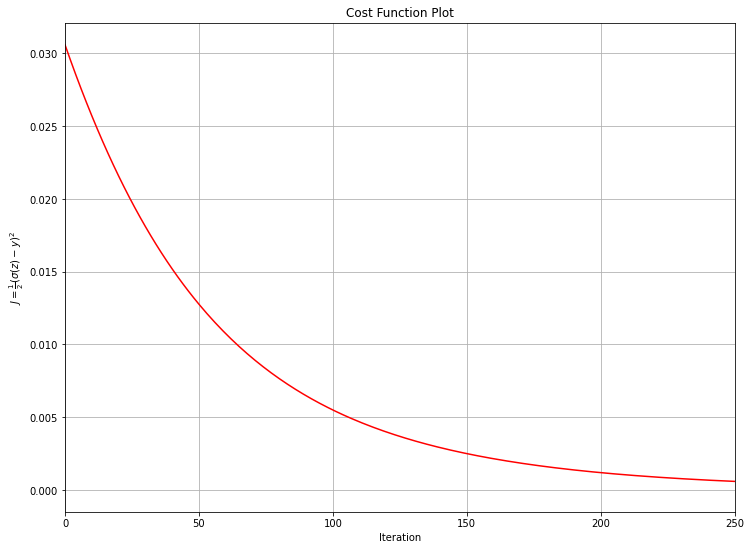

In [5]:
iteration = np.arange(len(J))
plt.plot(iteration,J,'r')
plt.grid()
plt.xlabel('Iteration')
plt.ylabel(r'$J = \frac{1}{2}\left(\sigma(z)-y \right)^2$')
plt.xlim(0,250)
plt.title('Cost Function Plot')

## Single Neuron Plot (Two training samples)

In [6]:
# Input
x_1 = [0.2, 0.1, 0.3]
x_2 = [0.5, 0.2, 0.4]

# Initial weights
w = [0.25, 0.2, 0.4]

# Training step (learning rate)
α = 1

# Desired output
y_1 = 0.2
y_2 = 0.8

# Iterations
t = 18000
n = len(x)

J = []

for i in range(t):
    wx1 = 0.0
    wx2 = 0.0

    for j in range(n):
        wx1 += w[j]*x_1[j]
        wx2 += w[j]*x_2[j]
        
    dJdw_1 = []
    dJdw_2 = []
    
    # Computing gradient
    for j in range(n):
        dJdw_1.append((ρ(wx1)-y_1)*ρ(wx1)*(1.-ρ(wx1))*x_1[j])
        dJdw_2.append((ρ(wx2)-y_2)*ρ(wx2)*(1.-ρ(wx2))*x_2[j])

    # Weight update using gradient descend
    for j in range(n):
        w[j] -= α * (dJdw_1[j]+dJdw_2[j])/2

    J.append( (1/2) * (0.5*(ρ(wx1)-y_1)**2 + 0.5*(ρ(wx2)-y_2)**2) )
        
print("Predicted values after", t, "iterations:" , ρ(wx1), " ",ρ(wx2))
print("Weights", w)

Predicted values after 18000 iterations: 0.21448763967830714   0.7919242450279652
Weights [12.638407166524628, 1.7760306934805672, -13.344599478685197]


Text(0.5, 1.0, 'Cost Function Plot')

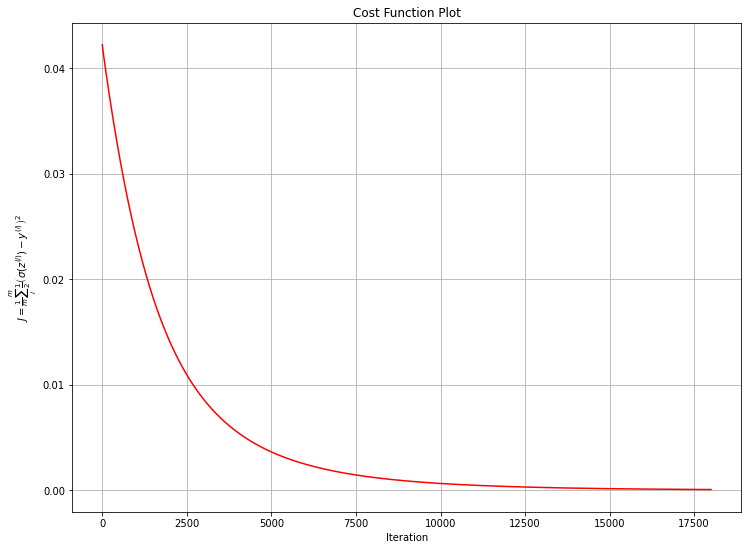

In [7]:
iteration = np.arange(len(J))
plt.plot(iteration,J,'r')
plt.grid()
plt.xlabel('Iteration')
plt.ylabel(r'$J = \frac{1}{m}\sum_i^m\frac{1}{2}\left(\sigma(z^{(i)})-y^{(i)} \right)^2$')
plt.title('Cost Function Plot')

### More samples

In [8]:
# Matrix of inputs
x = np.array([[0.2,0.1,0.3],[0.5,0.2,0.4],[0.9,0.7,0.8]]).T

# Vector of initial weights
w = np.array([0.25,0.2,0.4])

# Training step (learning rate)
α = 1

# Vector of desired outputs (one for each column in x)
y = np.array([0.2,0.8,0.3])

# Iterations
t = 28000

J = []

for i in range(t):
    wx = np.dot(w,x)  
    
    dJdw = np.dot((ρ(wx)-y)*ρ(wx)*(1-ρ(wx)),x.T)
    
    w -= α*dJdw/2
    
print("Predicted values after", t, "iterations:" , ρ(wx))
print("Weights", w)

Predicted values after 28000 iterations: [0.20462089 0.79657001 0.30033774]
Weights [ 15.53403579  -6.74092586 -12.63459304]


## Note:



### Non-convex optimization problem!

Here, we used the MSE error as the cost function for a classification problem, and it got accurate results for the training samples. If you take a look at the plot on the bottom, you will see that, when passing a sigmoid function to the MSE error, the plot never reach a minimum. It means that if we initialize the weights with a large enough magnitude, the gradient will be already zero or close to zero, so the weights will not get updated or they will do it really slowly.

We need to change this error when studying logistic regression:

$$\mathcal{L}\left(\hat{y},y\right)=-\left(y\log\hat{y}+\left(1-y\right)\log\left(1-\hat{y}\right)\right)$$

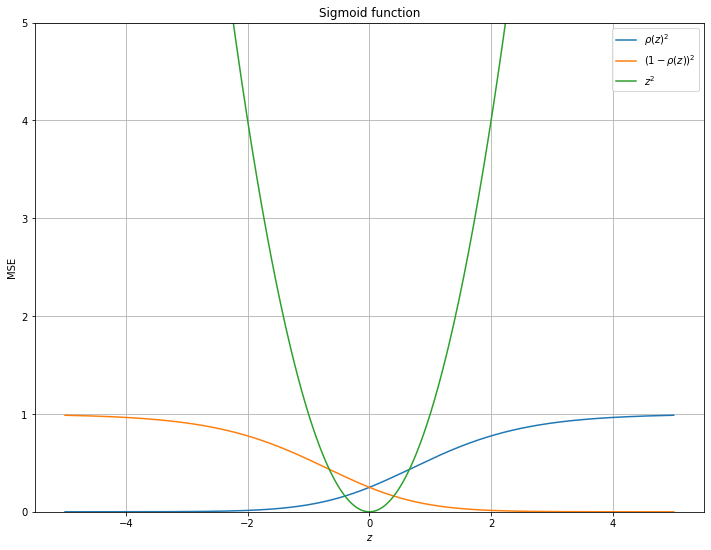

In [18]:
z = np.linspace(-5,5,500)
y_1 = ρ(z)**2
y_2 = (1-ρ(z))**2

plt.plot(z,y_1,label=r"$\rho(z)^2$")
plt.plot(z,y_2,label=r"$(1-\rho(z))^2$")
plt.plot(z,z**2, label=r"$z^2$")
plt.xlabel(r'$z$')
plt.ylabel("MSE")
plt.title('Sigmoid function')
plt.ylim(0,5)
plt.legend()
plt.grid()
plt.show()